
## Do American students from  Mercyhurst University who exercise everyday eat healthy?

### Author Georgi Dinev

## Abstract

This project investigates the eating and drinking habbits of the most physically active students from Mercyhurst University(USA). The final goal is to see if they eat healthy or not. For that purpose their food preferences, favourite cuisines, drink choises, breakfast preferences and their awareness about the food nutritions were explored from 3 different datasets. The result is that even though they exercise a lot, they tend to not care about what they eat in general.

In [26]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [28]:
us_students_data = pd.read_csv("data/food_coded.csv")
us_students_data.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [29]:
us_students_data.shape

(125, 61)

In [30]:
us_students_data.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [31]:
us_students_data = us_students_data.rename(columns={"exercise": "exercise_frequency", "nutritional_check" : "nutritional_check_frequency"})

Some of the data about the exercise frequency(13 observations) is missing but we can see how many of those students do sports

In [32]:
excercise_missing_data = us_students_data.loc[us_students_data.exercise_frequency.isna()]
excercise_missing_data.shape[0]


13

Looks like some of the students didn't say if they exercise. Lets see if they do sports 

In [33]:
def plot_students_number_who_do_sports(data_frame, xlabel):
    students_who_do_sports = data_frame[data_frame.sports == 1].shape[0]

    students_who_dont_do_sports = data_frame[data_frame.sports == 2].shape[0]

    plt.bar(["Yes", "No"], [students_who_do_sports, students_who_dont_do_sports])
    plt.xlabel(xlabel)
    plt.ylabel("Number of students")
    plt.show()

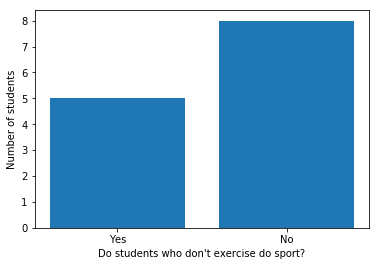

In [34]:
students_with_no_info_for_excercise = excercise_missing_data.loc[excercise_missing_data.index]

plot_students_number_who_do_sports(students_with_no_info_for_excercise, "Do students who don't exercise do sport?")

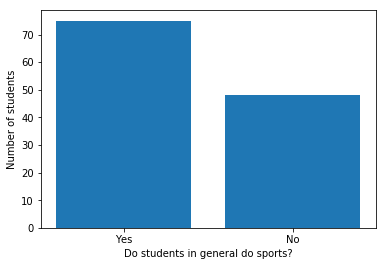

In [35]:
plot_students_number_who_do_sports(us_students_data, "Do students in general do sports?")

From the code bellow we can see that almost all(except for the nan's) students exercise at least once a week

In [36]:
def get_students_excercise_frequency(dataframe):
    num_students_by_excercise_frequncy = {}

    for frequency, group in dataframe.groupby("exercise_frequency"):
        
        frequency_str = get_exercise_frequency_string_representation(frequency)
        num_students_by_excercise_frequncy[frequency_str] = group.index.size
        
    return num_students_by_excercise_frequncy

In [37]:
def get_exercise_frequency_string_representation(freq_num):
    return {
         1: "Everyday",
         2: "2 or 3 times a week",
         3: "Once a week",
         4: "Sometimes",
         5: "Never"
    }[freq_num]

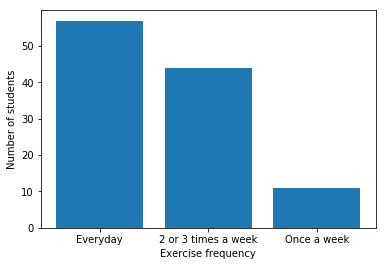

In [38]:
exercise_frequency = get_students_excercise_frequency(us_students_data)

plt.bar(exercise_frequency.keys(), exercise_frequency.values())
plt.xlabel("Exercise frequency")
plt.ylabel("Number of students")
plt.show()

Since we know that every student is doing physical exercises we will investigate if they do care about the nutrtitons in the food they consume.

In [39]:
def get_students_nutrition_check_frequency(dataframe):
    num_students_by_nutrition_check_frequency = {}

    for frequency, group in dataframe.groupby("nutritional_check_frequency"):
        
        frequency_str = get_nutrition_frequency_string_representation(frequency)
        num_students_by_nutrition_check_frequency[frequency_str] = group.index.size
        
    return num_students_by_nutrition_check_frequency

In [40]:
def get_nutrition_frequency_string_representation(freq_num):
    return {
         1: "Never",
         2: "On certain products",
         3: "Very rarely",
         4: "On most products",
         5: "On everything"
    }[freq_num]

In [41]:
def plot_students_nutrition_check(dataframe, exercise_freq_nums):
    
    legend_labels = []
    for freq_num in exercise_freq_nums:
        
        nutrition_check_data = dataframe.loc[dataframe.exercise_frequency == freq_num]
    
        nutrition_check_freq = get_students_nutrition_check_frequency(nutrition_check_data)

        plt.bar(nutrition_check_freq.keys(), nutrition_check_freq.values(), alpha=0.8)
    
        legend_labels.append(get_exercise_frequency_string_representation(freq_num))
        
    plt.xlabel("Nutritional check frequency for people who exercise ")
    plt.ylabel("Number of students")
    plt.xticks(rotation="vertical")
    plt.legend(legend_labels)
    plt.show()

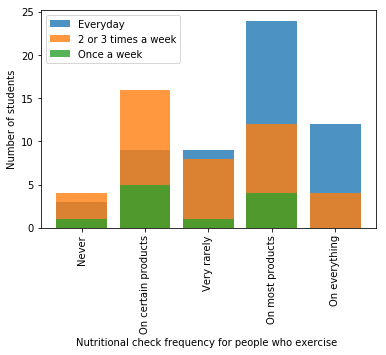

In [42]:
plot_students_nutrition_check(us_students_data, [1,2,3])

From the bar charts above we can say that the students who are more engaged in physical excercises are more likely to look at the nutritions of the food they consume. On the other hand the people who train less are likely to check the nutritions only on certain products.

Lets see if those those who exercise everyday  take vitamins.



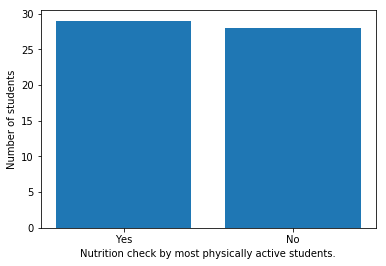

In [44]:
most_physically_active_students = us_students_data.loc[us_students_data.exercise_frequency == 1]

most_physically_active_students_who_take_vitamins = most_physically_active_students.loc[most_physically_active_students.vitamins == 1]
most_physically_active_students_who_dont_take_vitamins = most_physically_active_students.loc[most_physically_active_students.vitamins == 2]

count_most_active_who_take_vitamins = most_physically_active_students_who_take_vitamins.shape[0]
count_most_active_who_dont_take_vitamins = most_physically_active_students_who_dont_take_vitamins.shape[0]

plt.bar(["Yes", "No"], [count_most_active_who_take_vitamins,count_most_active_who_dont_take_vitamins ])
plt.xlabel("Nutrition check by most physically active students.")
plt.ylabel("Number of students")
plt.show()

 How likely are most physically active students to eat fruit in a regular day ? According to them they are in most cases likely or very likely to do that.

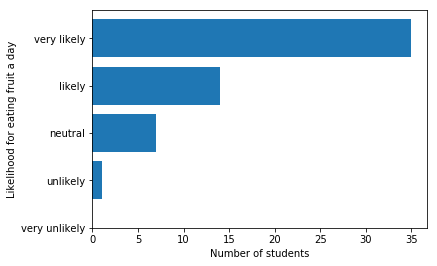

In [60]:
fruit_eating_likelihood =  most_physically_active_students.groupby("fruit_day").size()

plt.barh(fruit_eating_likelihood.index, fruit_eating_likelihood)
plt.ylabel("Likelihood for eating fruit a day")
plt.xlabel("Number of students")
plt.yticks(range(1,6),["very unlikely", "unlikely", "neutral", "likely", "very likely"])
plt.show()

What about their diet? Almost half of the students who exercise everyday do not eat healthy food. Most probably this is because university is time comsuming and they don't have time to cook their own food or don't have enough money to buy quality food? But this is a completely different topic.


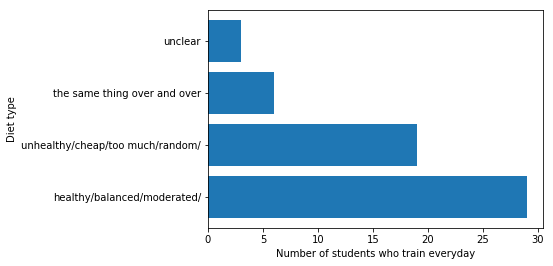

In [61]:
students_by_diet_type = most_physically_active_students.groupby("diet_current_coded").size()
plt.barh(students_by_diet_type.index, students_by_diet_type)

plt.yticks(range(1,5), ["healthy/balanced/moderated/", "unhealthy/cheap/too much/random/", "the same thing over and over", "unclear"])

plt.xlabel("Number of students who train everyday")
plt.ylabel("Diet type")
plt.show()

Do the students who exercise the most and have the healthinest diets tend to drink more soda or more orange juice ?


In [62]:
def plot_drinking_preference(dataframe, ylabel= "Number of most physically active students"):
    
    drinking_prefs = dataframe.groupby("drink").size()

    plt.bar(drinking_prefs.index, drinking_prefs)
    plt.xticks(range(1,3), ["orange juice", "soda"])

    plt.xlabel("Which picture do you associate with the word “drink”")
    plt.ylabel(ylabel)
    plt.show()

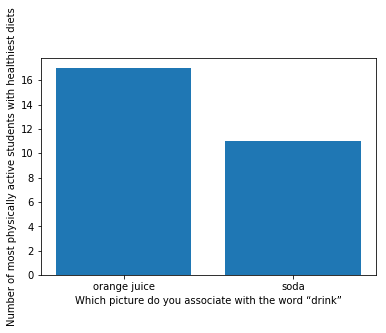

In [63]:
most_physically_active_students_with_healthiest_diets = most_physically_active_students[most_physically_active_students.diet_current_coded == 1]
plot_drinking_preference(most_physically_active_students_with_healthiest_diets, ylabel= "Number of most physically active students with healthiest diets")

From the code below we can see that only 17 of 28 prefer orange juice than soda.

In [64]:
num_juice_drinkers_among_most_phys_active = most_physically_active_students_with_healthiest_diets.groupby("drink").size()
print(num_juice_drinkers_among_most_phys_active)
print("----------")

drink
1.0    17
2.0    11
dtype: int64
----------


What about the drinking preferences among all students who exercise everyday but their diets can vary?

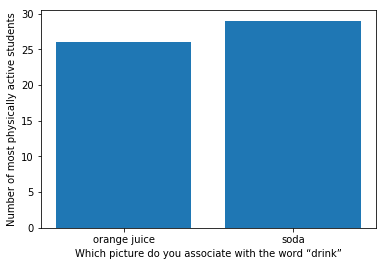

In [65]:
plot_drinking_preference(most_physically_active_students)

In [66]:
print(most_physically_active_students.groupby("drink").size())
print("----------")

drink
1.0    26
2.0    29
dtype: int64
----------


For breakfast the most physically active students  would rather chose the cereal option than the donut one.

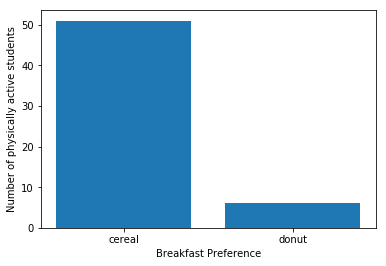

In [67]:
cereal_breakfasts = most_physically_active_students[most_physically_active_students.breakfast == 1].shape[0]
donut_breakfasts = most_physically_active_students[most_physically_active_students.breakfast == 2].shape[0]
plt.bar(["cereal", "donut"], [cereal_breakfasts, donut_breakfasts])

plt.xlabel("Breakfast Preference")
plt.ylabel("Number of physically active students")
plt.show()

Its time to explore the favourite cuisines of the every day exercising students.

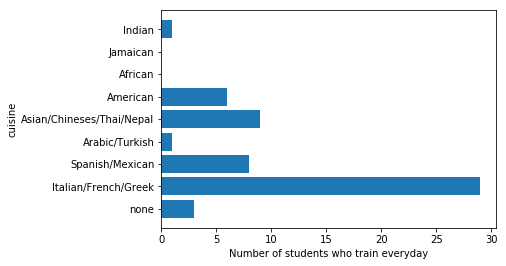

In [70]:
fav_cuisines_most_of_active_students = most_physically_active_students.groupby("fav_cuisine_coded").size()

plt.barh(fav_cuisines_most_of_active_students.index, fav_cuisines_most_of_active_students)

favourite_cousines = ["none", "Italian/French/Greek", "Spanish/Mexican", "Arabic/Turkish", "Asian/Chineses/Thai/Nepal", "American","African",  "Jamaican", "Indian"]
plt.yticks(range(len(favourite_cousines)),favourite_cousines )

plt.ylabel("cuisine")
plt.xlabel("Number of students who train everyday")
plt.show()

Lets see what ingredients we have in the top 3 cousines(Italian, French, Greek). To do that we will use the Whats Cooking dataset which is available here: https://www.kaggle.com/c/whats-cooking/data.  

In [71]:
favourite_cuisines = ["italian", "french", "greek"]

cuisines_data = pd.read_json("data/cuisine-dataset.json")

cuisines_data = cuisines_data.rename(columns={"cuisine": "cuisine_name"})
cuisines_data.head()

,cuisine_name,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


Since we don't need the 'id' column it will be removed;

In [72]:
cuisines_data =cuisines_data.drop("id", axis=1)
cuisines_data.dtypes

cuisine_name    object
ingredients     object
dtype: object

In [73]:
students_favourite_cuisines = cuisines_data.loc[cuisines_data.cuisine_name.str.lower().isin(favourite_cuisines)]
students_favourite_cuisines.head()

,cuisine_name,ingredients
0,greek,"[romaine lettuce, black olives, grape tomatoes..."
7,italian,"[sugar, pistachio nuts, white almond bark, flo..."
9,italian,"[chopped tomatoes, fresh basil, garlic, extra-..."
10,italian,"[pimentos, sweet pepper, dried oregano, olive ..."
12,italian,"[Italian parsley leaves, walnuts, hot red pepp..."


In [92]:
def find_top_ten_most_used_igredients(dataframe, cuisine_name):
    cuisine_data = dataframe[dataframe["cuisine_name"] == cuisine_name]
    stopwords = set(["salt", "sugar", "water"])
    
    flatten_and_lower = lambda l: [item.lower() for sublist in l for item in sublist if item not in stopwords]
    
    counter = Counter(flatten_and_lower(cuisine_data.ingredients.ravel()))
    return counter.most_common(10)
    

In [95]:
italian_ingredients = find_top_ten_most_used_igredients(students_favourite_cuisines,"italian" )
print("Italian cuisine top 10 most used ingredients")
italian_ingredients

Italian cuisine top 10 most used ingredients


[('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('butter', 1030),
 ('pepper', 965),
 ('all-purpose flour', 918)]

In [96]:
french_ingredients = find_top_ten_most_used_igredients(students_favourite_cuisines,"french" )
print("French cuisine top 10 most used ingredients")
french_ingredients

French cuisine top 10 most used ingredients


[('all-purpose flour', 593),
 ('unsalted butter', 592),
 ('olive oil', 516),
 ('butter', 514),
 ('large eggs', 415),
 ('garlic cloves', 403),
 ('ground black pepper', 385),
 ('onions', 368),
 ('shallots', 321),
 ('extra-virgin olive oil', 256)]

In [98]:
greek_ingredients = find_top_ten_most_used_igredients(students_favourite_cuisines,"greek" )
print("Greek cuisine top 10 most used ingredients")
greek_ingredients

Greek cuisine top 10 most used ingredients


[('olive oil', 504),
 ('dried oregano', 267),
 ('garlic cloves', 254),
 ('feta cheese crumbles', 252),
 ('extra-virgin olive oil', 229),
 ('fresh lemon juice', 222),
 ('ground black pepper', 221),
 ('garlic', 216),
 ('pepper', 203),
 ('feta cheese', 191)]

Lets load another dataset and explore more detailed data about those cuisines

In [103]:
food_data = pd.read_table("data/en.openfoodfacts.org.products.tsv", low_memory=False)
food_data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
food_data = food_data.rename(columns={"nutrition-score-fr_100g": "nutrition_score_fr_100g", "nutrition-score-uk_100g": "nutrition_score_uk_100g", "trans-fat_100g": "trans_fat_100g"})

In [106]:
def generate_or_regex(words):
    regex = ""
    for word in words:
        regex += word+"|"
        
    return regex[:-1]

Now it's time to see the average nutrition score for all products sold in Italy, France, Greece and in some of the other cuisines. The nutrition score is an aggregated value of the nutritions in each product. Lets first see the score aggregated data from all available coutries.

The nutrition scores from both 'fr' and 'uk' type scores are the same and with the same length. So it doesn't matter which column we will chose for the scoring.

In [111]:
diff_nutrition_score_by_country = food_data[(food_data["nutrition_score_fr_100g"] != food_data["nutrition_score_uk_100g"])].dropna()

assert diff_nutrition_score_by_country.shape[0] == 0
assert food_data["nutrition_score_fr_100g"].shape[0] == food_data["nutrition_score_uk_100g"].shape[0]

In [113]:
print("Nutrition score for all countries")
food_data["nutrition_score_fr_100g"].describe()

Nutrition score for all countries


count    254856.000000
mean          9.166137
std           8.999870
min         -15.000000
25%           1.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutrition_score_fr_100g, dtype: float64

In [114]:
def find_data_for_country(dataframe, country_keywords):
    regex = generate_or_regex(country_keywords)
    return dataframe[~(dataframe.countries_en.isna()) & (dataframe.countries_en.str.lower().str.contains(regex))]

In [115]:
italy_keywords = ["italien", "italy", "italie" ]

italy_food_data = find_data_for_country(food_data, italy_keywords)
italy_food_data["nutrition_score_fr_100g"].describe()

count    522.000000
mean       9.189655
std        8.733001
min      -10.000000
25%        1.000000
50%        9.000000
75%       16.000000
max       28.000000
Name: nutrition_score_fr_100g, dtype: float64

In [116]:
french_keywords = ["france", "french"]
france_food_data = find_data_for_country(food_data, french_keywords)

france_food_data["nutrition_score_fr_100g"].describe()

count    93395.000000
mean         8.861192
std          8.903680
min        -15.000000
25%          1.000000
50%          9.000000
75%         15.000000
max         40.000000
Name: nutrition_score_fr_100g, dtype: float64

In [117]:
greece_food_data = find_data_for_country(food_data, ["greece"])


greece_food_data["nutrition_score_fr_100g"].describe()

count    34.000000
mean      8.617647
std       9.871952
min      -5.000000
25%       0.000000
50%      11.000000
75%      15.000000
max      26.000000
Name: nutrition_score_fr_100g, dtype: float64

Note that the sample size of Greece is very small compared to Italy and France

Lets investigate the nutrition scores for the not so popular among the students cuisines. 

In [118]:
spanish_food = find_data_for_country(food_data, ["spain", "spanish"])
spanish_food["nutrition_score_fr_100g"].describe()

count    3002.000000
mean        6.153897
std         9.104029
min       -14.000000
25%        -1.000000
50%         5.000000
75%        13.000000
max        29.000000
Name: nutrition_score_fr_100g, dtype: float64

In [119]:
mexican_food = find_data_for_country(food_data, ["mexico", "mexican"])
mexican_food["nutrition_score_fr_100g"].describe()

count    95.000000
mean      6.305263
std       8.672620
min      -7.000000
25%       0.000000
50%       1.000000
75%      13.000000
max      26.000000
Name: nutrition_score_fr_100g, dtype: float64

In [120]:
thai_food = find_data_for_country(food_data, ["thai", "thailand"])
thai_food["nutrition_score_fr_100g"].describe()

count    22.000000
mean     10.318182
std       8.730823
min       0.000000
25%       2.500000
50%      10.000000
75%      17.000000
max      28.000000
Name: nutrition_score_fr_100g, dtype: float64

In [121]:
chinese_food = find_data_for_country(food_data, ["china", "chinese"])
chinese_food["nutrition_score_fr_100g"].describe()

count    12.000000
mean     17.166667
std       8.494205
min       2.000000
25%      13.000000
50%      14.500000
75%      26.000000
max      28.000000
Name: nutrition_score_fr_100g, dtype: float64

In [122]:
american_food = find_data_for_country(food_data, ["america", "usa", "american", "united states", "united states of america"])
american_food["nutrition_score_fr_100g"].describe()

count    139492.000000
mean          9.450814
std           9.011265
min         -10.000000
25%           1.000000
50%          10.000000
75%          17.000000
max          40.000000
Name: nutrition_score_fr_100g, dtype: float64

Look like the Chinese cuisine has the best stats so far but unfortunetely the data is not enough (only 12 observations) so those values will be ignored as well as the  thai cuisine.

The top 3 favourite cuisines among the students who exercise everyday tend to have better nutritions than Spain and Mexican cuisines. Also their means are very close to the global ones.

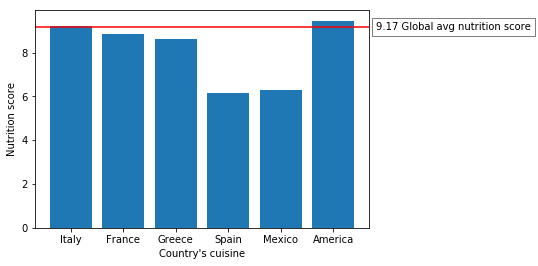

In [123]:
nutrition_scores = [italy_food_data["nutrition_score_fr_100g"].mean(),
                    france_food_data["nutrition_score_fr_100g"].mean(),
                    greece_food_data["nutrition_score_fr_100g"].mean(),
                    spanish_food["nutrition_score_fr_100g"].mean(),
                    mexican_food["nutrition_score_fr_100g"].mean(),
                    american_food["nutrition_score_fr_100g"].mean()
                   ]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(9.17, color="red")
ax.text(1.02, 9.17, s= "9.17 Global avg nutrition score", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_yaxis_transform())

plt.bar(["Italy", "France", "Greece", "Spain", "Mexico", "America"], nutrition_scores )
plt.xlabel("Country's cuisine")
plt.ylabel("Nutrition score")
plt.show()

Lets compare the average trans fat amount for 100 g. from each of those countries. Trans fats are the worst kind of fats.

Citation from Harvard Medical school: "Eating foods rich in trans fats increases the amount of harmful LDL cholesterol in the bloodstream and reduces the amount of beneficial HDL cholesterol. Trans fats create inflammation, which is linked to heart disease, stroke, diabetes, and other chronic conditions. They contribute to insulin resistance, which increases the risk of developing type 2 diabetes. Even small amounts of trans fats can harm health: for every 2% of calories from trans fat consumed daily, the risk of heart disease rises by 23%. Trans fats have no known health benefits and that there is no safe level of consumption. "

source: https://www.health.harvard.edu/staying-healthy/the-truth-about-fats-bad-and-good

First we will ensure that all the data has at least 30 observations. The commented lines are the countries which tests failed.

In [124]:
# assert italy_food_data.trans_fat_100g.dropna().shape[0] >= 30
assert france_food_data.trans_fat_100g.dropna().shape[0] >= 30
# assert greece_food_data.trans_fat_100g.dropna().shape[0] >= 30
# assert spanish_food.trans_fat_100g.dropna().shape[0] >= 30
# assert mexican_food.trans_fat_100g.dropna().shape[0] >= 30
assert american_food.trans_fat_100g.dropna().shape[0] >= 30

From the chart bellow we can see that French products have 2 times more trans fat than the global average which is strange(maybe the data is biased).

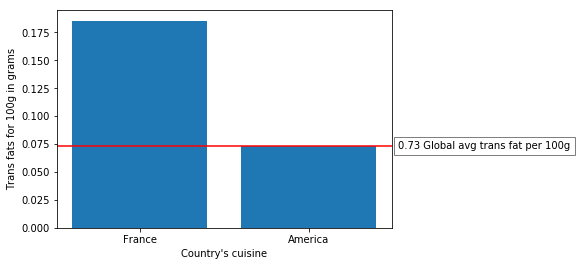

In [127]:
trans_fats = [france_food_data.trans_fat_100g.mean(),
                    american_food.trans_fat_100g.mean()
                   ]

global_avg_trans_fat_100g = food_data.trans_fat_100g.mean()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(global_avg_trans_fat_100g, color="red")
ax.text(1.02, global_avg_trans_fat_100g, s= "0.73 Global avg trans fat per 100g", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_yaxis_transform())

plt.bar(["France", "America"], trans_fats )
plt.xlabel("Country's cuisine")
plt.ylabel("Trans fats for 100g in grams")
plt.show()

## Conclusion
Even though the majority of students who train everyday care about the nutritions in the food they consume, more than half of them don't eat healthy food and some of them drink soda. The products from their favourite cuisines tend to have an average nutrition score and French cuisine has twice the amount of the trans fats. So the answer to the question: "Do American students from  Mercyhurst University who exercise every day eat healthy?" is NO.


# References
used datasets:

https://www.kaggle.com/openfoodfacts/world-food-facts

https://www.kaggle.com/c/whats-cooking

https://www.kaggle.com/borapajo/food-choices

info:

https://www.health.harvard.edu/staying-healthy/the-truth-about-fats-bad-and-good

https://aboutthechef.com/blog/italian-cuisine-vs-french-cuisine/
